In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3248.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2803.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_650.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2060.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_559.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3273.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_124.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1849.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_139.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2137.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2438.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_553.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2661.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_966.jp

In [20]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [21]:
batch_size = 32
img_height = 200
img_width =200

In [22]:
training = tf.keras.preprocessing.image_dataset_from_directory(
           '/kaggle/input/face-mask-dataset/data',
             validation_split = 0.2,
             subset = 'training',
             seed = 42,
             image_size= (img_height, img_width),
              batch_size=batch_size)

Found 7553 files belonging to 2 classes.
Using 6043 files for training.


In [23]:
testing = tf.keras.preprocessing.image_dataset_from_directory(
'/kaggle/input/face-mask-dataset/data',
    validation_split=0.2,
    subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)



Found 7553 files belonging to 2 classes.
Using 1510 files for validation.


In [24]:
class_names = training.class_names
print(class_names)

['with_mask', 'without_mask']


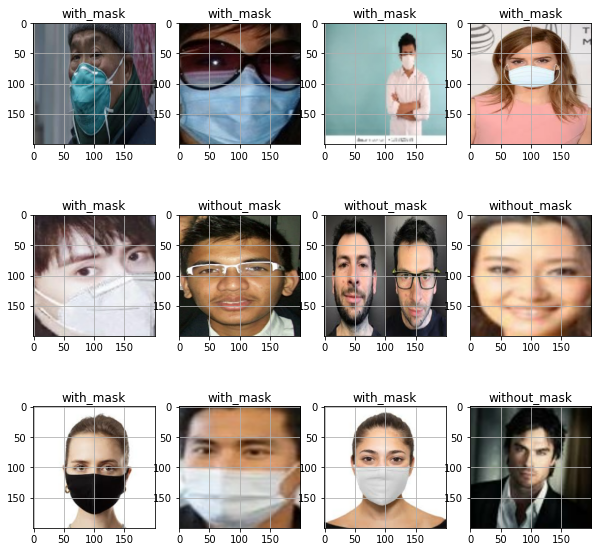

In [25]:
plt.figure(figsize=(10, 10))
for images, labels in training.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.grid(True)

In [26]:
testing_array = np.array(testing)
training_array = np.array(training)

type(testing_array)


numpy.ndarray

In [27]:
model = Sequential(

[layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),

  layers.GlobalAveragePooling2D(),
  layers.Dense(256, activation='relu'),
  layers.Dense(2, activation= 'softmax')])

In [28]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(training, validation_data= testing, epochs = 15)

Epoch 1/15
189/189 [==============================] - 55s 286ms/step - loss: 0.6146 - accuracy: 0.6518 - val_loss: 0.5362 - val_accuracy: 0.7358
Epoch 2/15
189/189 [==============================] - 18s 95ms/step - loss: 0.5350 - accuracy: 0.7361 - val_loss: 0.5333 - val_accuracy: 0.7331
Epoch 3/15
189/189 [==============================] - 19s 96ms/step - loss: 0.5198 - accuracy: 0.7459 - val_loss: 0.4755 - val_accuracy: 0.7768
Epoch 4/15
189/189 [==============================] - 19s 97ms/step - loss: 0.4810 - accuracy: 0.7683 - val_loss: 0.4054 - val_accuracy: 0.8278
Epoch 5/15
189/189 [==============================] - 18s 93ms/step - loss: 0.4120 - accuracy: 0.8213 - val_loss: 0.3358 - val_accuracy: 0.8675
Epoch 6/15
189/189 [==============================] - 18s 92ms/step - loss: 0.3609 - accuracy: 0.8489 - val_loss: 0.2995 - val_accuracy: 0.8947
Epoch 7/15
189/189 [==============================] - 19s 97ms/step - loss: 0.3289 - accuracy: 0.8655 - val_loss: 0.2837 - val_accuracy

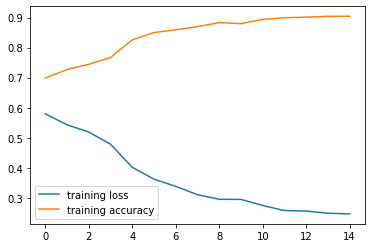

In [31]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.legend()

InvalidArgumentError: slice index 32 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

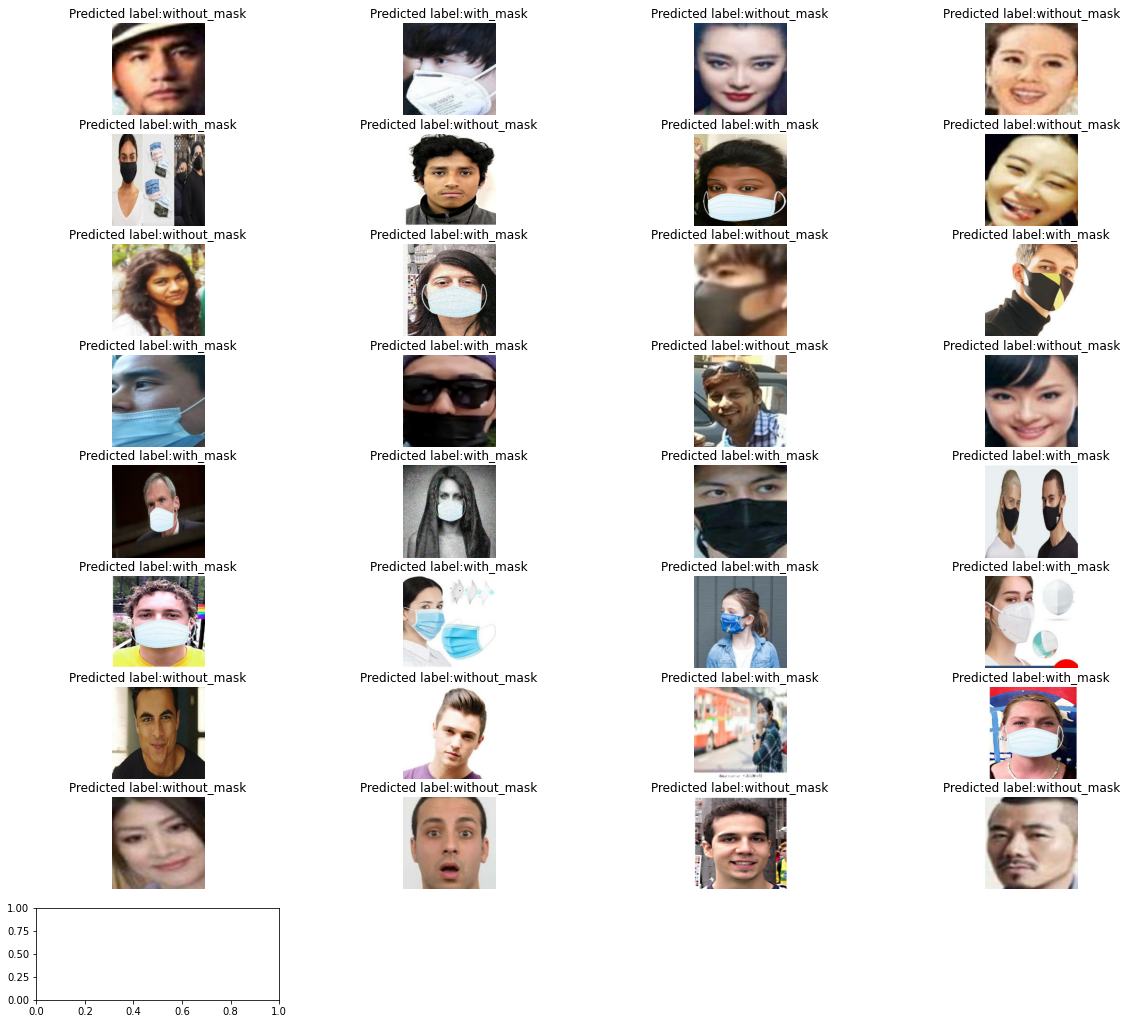

In [33]:
plt.figure(figsize=(20, 20))
for images, labels in testing.take(1):
    predictions = model.predict(images)
    predlabel = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
    
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Predicted label:'+ predlabel[i])
        plt.axis('off')
        plt.grid(True)

In [36]:
def LoadAndDetectObject(path, boxSize = 100, lim = 200):
    img = plt.imread(path)
    img = cv2.resize(img,(200,200))
    numplots = (lim / boxSize)*(lim /boxSize)
    stride = int ((lim - boxSize)/ boxSize)
    
    xCurPos = 0
    yCurPos = 0
    Red = img [:,:,0]
    Blue = img[:,:,1]
    Green = img[:,:,2]
    
    y_pos = 0
    i = 0
    while y_pos < lim:
        x_pos = 0
        while x_pos < lim:
            xCurPos = x_pos
            yCurPos = y_pos
            i += 1
            if i > numplots + 1000:
                cv2.putText(img, 'No Mask', (50,50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
                plt.imshow(img)
                return
            
            
            r = Red[x_pos : (x_pos + boxSize), y_pos : (y_pos + boxSize)]
            g = Blue[x_pos : (x_pos + boxSize), y_pos : (y_pos + boxSize)]
            b = Green[x_pos : (x_pos + boxSize), y_pos : (y_pos + boxSize)]
            
            ## sanity check
            xx, yy = r.shape
            if xx*yy != boxSize*boxSize:
                x_pos += stride
                continue
               
            imageSegment = cv2.merge((r,g,b))
            imageSegment  = np.array(imageSegment, dtype = 'uint8')
            imageSegment = cv2.resize(imageSegment, (lim, lim))
            result = (model.predict(np.array([imageSegment])))
            probab = max(result.flatten())
            result = (class_names[np.argmax(result)])
            #print(probab)
            
            if result == 'with_mask' and probab >= 0.8:
                probab = int (probab * 100) / 100
                img = cv2.rectangle(img, (xCurPos,yCurPos), (xCurPos + boxSize, yCurPos + boxSize), (0,255,0), 1) 
                cv2.putText(img, 'Mask', (xCurPos,yCurPos + boxSize), cv2.FONT_HERSHEY_SIMPLEX, 0.7, 1)
                plt.imshow(img)
                return
            
            
            
            
            x_pos += stride
        y_pos += stride
        
    cv2.putText(img, 'No Mask', (100,100), cv2.FONT_HERSHEY_SIMPLEX, 0.7, 1)
    plt.imshow(img)
    
    

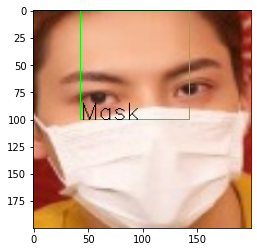

In [37]:
LoadAndDetectObject('/kaggle/input/face-mask-dataset/data/with_mask/with_mask_1323.jpg')